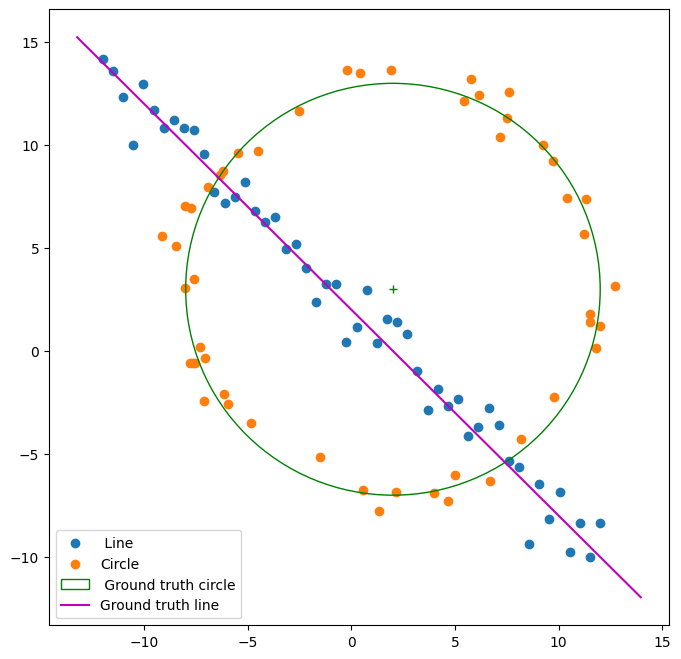

In [1]:
# Generation o f a Noisy Po in t Set Conforming to a Line and a Circle
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
import tikzplotlib

# np . random . seed ( 0 )
N = 100
half_n = N//2
r = 10
x0_gt , y0_gt = 2 , 3 # Center
s = r /16

t = np.random.uniform (0 ,2*np.pi,half_n)

n = s*np.random.randn( half_n )

x,y = x0_gt + (r + n)*np.cos(t) , y0_gt + (r + n)*np.sin(t)

X_circ = np.hstack((x.reshape(half_n , 1) ,y.reshape(half_n , 1)))

s = 1.
m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn( half_n )

X_line = np.hstack((x.reshape( half_n , 1 ) , y.reshape( half_n , 1 )))
X = np.vstack ( ( X_circ , X_line ) ) # All points


# Plotting
fig , ax = plt . subplots (1 ,1 , figsize =(8 ,8))
ax . scatter ( X_line [ : , 0 ] , X_line [ : , 1 ] , label= ' Line'  )
ax . scatter ( X_circ [ : , 0 ] , X_circ [ : , 1 ] , label= 'Circle' )
circle_gt = plt.Circle(( x0_gt , y0_gt ) , r , color= 'g' , fill =False , label= ' Ground truth circle')
ax . add_patch ( circle_gt )
ax.plot((x0_gt) , (y0_gt) , '+' , color= 'g' )
x_min , x_max = ax.get_xlim ()
x_ = np.array([x_min,x_max])
y_ = m*x_ + b
plt . plot ( x_ , y_ , color= 'm' , label= 'Ground truth line')
plt . legend ()

In [2]:
def Line_RANSAC(points,distance_threshold):
    
    max_iterations = 10000
    
    best_line = None
    best_inliers_index = []
    
    for _ in range(max_iterations):
        
        # Randomly select two points to define a line
        sample_indices = np.random.choice(len(points), size=2, replace=False)
        sample = points[sample_indices]
        
        # Calculate the unit normal vector to the line
        x1, y1 = sample[0]
        x2, y2 = sample[1]
        if x1 == x2:
            continue  # Avoid division by zero
        direction_vector = np.array([y1 - y2, x2 - x1])
        unit_normal_vector = direction_vector / np.linalg.norm(direction_vector)    
        d_init =  np.abs(np.dot(unit_normal_vector, np.array([x1, y1])))

        # Calculate the perpendicular distance from the origin to the line
        perpendicular_distances = [np.abs(np.dot(unit_normal_vector, np.array([x, y]))) for x, y in points]
        
        # Find inliers based on the distance threshold
        inliers_index = [i for i, distance in enumerate(perpendicular_distances) if  np.abs(distance-d_init) < distance_threshold]
        
        # Update the best model if this one has more inliers
        if len(inliers_index) > len(best_inliers_index):
            best_line = (unit_normal_vector, d_init)
            best_inliers_index = inliers_index
            best_fitting_points = sample
            
    return best_line, best_inliers_index, best_fitting_points


2b

In [3]:
#calculate the circle parameters
def circle_equation(params, points):
    h, k, r = params
    residuals = []
    for x, y in points:
        residuals.append((x - h)**2 + (y - k)**2 - r**2)
    return np.array(residuals)


In [4]:
def circle_RANSAC(points,radial_distance_threshold):
    
    max_iterations = 10000

    best_circle = None
    best_inliers_index = []

    for _ in range(max_iterations):

        # Randomly select three points to define a circle
        sample_indices = np.random.choice(len(points), size=3, replace=False)
        sample = points[sample_indices]

        # Calculate the center and radius of the estimated circle
        x1, y1 = sample[0]
        x2, y2 = sample[1]
        x3, y3 = sample[2]
        
        # use optimizer to get values
        result = minimize(lambda params: np.sum(circle_equation(params, sample)**2), [0,0,1])

        #optimized center coordinates and radius
        h_opt, k_opt, r_opt = result.x

        # Calculate the perpendicular distance from the origin to the circle
        radial_distances = [np.abs(np.sqrt((x - h_opt)**2 + (y - k_opt)**2) - r_opt) for x, y in points]

        # Find inliers based on the distance threshold
        inliers_index = [i for i, distance in enumerate(radial_distances) if distance < radial_distance_threshold]

        # Update the best model if this one has more inliers
        if len(inliers_index) > len(best_inliers_index):
            best_circle = (np.array([h_opt,k_opt]), r_opt)
            best_inliers_index = inliers_index
            best_fitting_points = sample

    return best_circle, best_inliers_index, best_fitting_points

2 C

In [5]:
# Generation o f a Noisy Po in t Set Conforming to a Line and a Circle
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
import tikzplotlib

# np . random . seed ( 0 )
N = 100
half_n = N//2
r = 10
x0_gt , y0_gt = 2 , 3 # Center
s = r /16

t = np.random.uniform (0 ,2*np.pi,half_n)

n = s*np.random.randn( half_n )

x,y = x0_gt + (r + n)*np.cos(t) , y0_gt + (r + n)*np.sin(t)

X_circ = np.hstack((x.reshape(half_n , 1) ,y.reshape(half_n , 1)))

s = 1.
m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn( half_n )

X_line = np.hstack((x.reshape( half_n , 1 ) , y.reshape( half_n , 1 )))
X = np.vstack ( ( X_circ , X_line ) ) # All points

In [6]:
#estimated line
estimated_line, inliers_index_line,best_fit_points_line = Line_RANSAC(X,1)
x_val = np.linspace(-15, 15, 100)

# calculate the y values of the estimated line
m_est = -estimated_line[0][0] / estimated_line[0][1]
b_est = estimated_line[1] / np.cos(np.arctan(abs(m_est)))
y_val = m_est*x_val + b_est


In [ ]:
#estimated circle
points_circle = X.copy()

# remove the inliers of the line from points_circle
points_circle = np.delete(points_circle, inliers_index_line, axis=0)
    
estimated_circle, inliers_index_circle,best_fit_points_circle = circle_RANSAC(points_circle,1)
theta = np.linspace(0, 2*np.pi, 100)
x_val_circle = estimated_circle[0][0] + estimated_circle[1]*np.cos(theta)
y_val_circle = estimated_circle[0][1] + estimated_circle[1]*np.sin(theta)


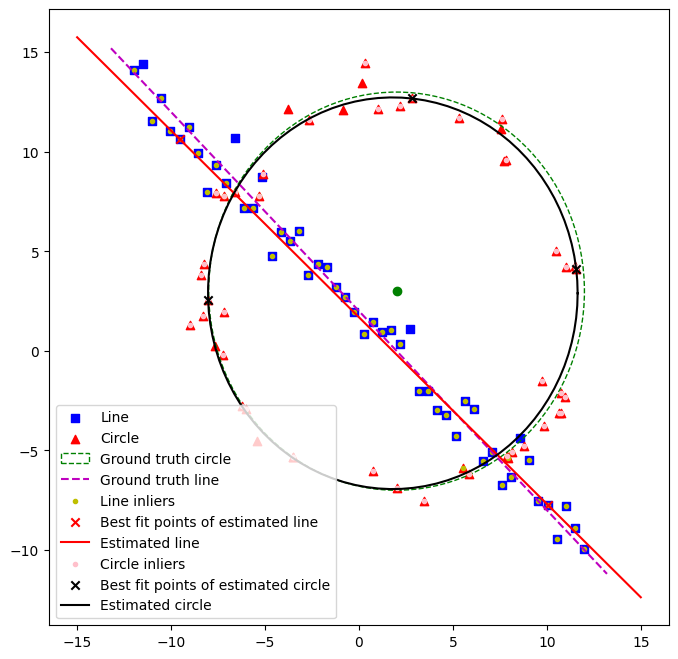

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot for the 'Line' data
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line', color='b', marker='s')

# Scatter plot for the 'Circle' data
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle', color='r', marker='^')

# Ground truth circle
circle_gt = Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle', linestyle='--')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, 'o', color='g')

# Ground truth line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
ax.plot(x_, y_, color='m', label='Ground truth line', linestyle='--')

# Line inliers
ax.scatter(X[inliers_index_line][:, 0], X[inliers_index_line][:, 1], color='y', label='Line inliers', marker='.')

# Best fit points of estimated line
ax.scatter(np.array(best_fit_points_line)[:, 0], np.array(best_fit_points_line)[:, 1],
           marker='x', color='r', label='Best fit points of estimated line')
ax.plot(x_val, y_val, color='r', label='Estimated line')

# Circle inliers
ax.scatter(X[inliers_index_circle][:, 0], X[inliers_index_circle][:, 1], color='pink', label='Circle inliers', marker='.')

# Best fit points of estimated circle
ax.scatter(np.array(best_fit_points_circle)[:, 0], np.array(best_fit_points_circle)[:, 1],
           marker='x', color='k', label='Best fit points of estimated circle')
ax.plot(x_val_circle, y_val_circle, color='k', label='Estimated circle')

# Set axis labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Scatter Plot Visualization')

# Add a legend
ax.legend()

# Display the plot
plt.grid(True)
plt.show()
